In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [29]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header = None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header = None )

train_df.head(), test_df.head()

(        0         1         2         3         4         5         6    \
 0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
 1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
 2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
 3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
 4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
 
         7         8         9    ...  178  179  180  181  182  183  184  185  \
 0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
 
    186  187  
 0  0.0  0.0  
 1  0.0  0.0  
 2  0.0  

In [30]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [31]:
train_df.columns.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


## EDA 

In [33]:
!pip install seaborn -q

In [19]:
!pip install imbalance-learn -q

ERROR: Could not find a version that satisfies the requirement imbalance-learn (from versions: none)
ERROR: No matching distribution found for imbalance-learn


In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, classification_report


In [36]:
#Input  
train_target=train_df[187]
test_target=test_df[187]

#Y
train=train_df.drop(187,axis=1)
test=test_df.drop(187,axis=1)

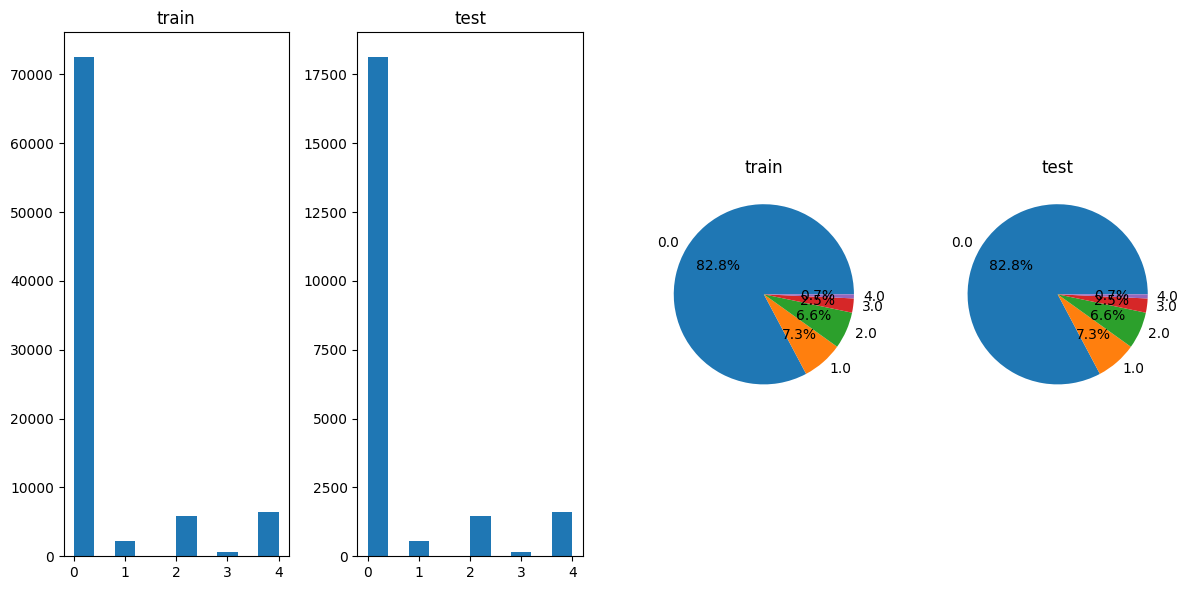

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.hist(train_df[187])
plt.title("train")

plt.subplot(1,4,2)
plt.hist(test_df[187])
plt.title("test")

plt.subplot(1,4,3)
plt.pie(train_target.value_counts(),labels=train_target.unique(),autopct='%1.1f%%')
plt.title("train")

plt.subplot(1,4,4)
plt.pie(test_target.value_counts(),labels=test_target.unique(),autopct='%1.1f%%')
plt.title("test")

plt.tight_layout()
plt.show()

# Raw SVM (No Balancing)

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC(cache_size=500, verbose = True)


In [42]:
model.fit(train,train_target)


[LibSVM]....*..*
optimization finished, #iter = 6355
obj = -2434.846163, rho = -1.358612
nSV = 3123, nBSV = 2557
....*..*
optimization finished, #iter = 6571
obj = -2734.478879, rho = -2.490158
nSV = 3903, nBSV = 3205
.*
optimization finished, #iter = 1383
obj = -956.908422, rho = -2.444995
nSV = 1198, nBSV = 1075
..*
optimization finished, #iter = 2839
obj = -1431.594605, rho = -2.784682
nSV = 1962, nBSV = 1664
.*
optimization finished, #iter = 1765
obj = -695.321260, rho = 0.502845
nSV = 1100, nBSV = 839
*
optimization finished, #iter = 553
obj = -268.453497, rho = -0.757998
nSV = 402, nBSV = 303
*
optimization finished, #iter = 878
obj = -367.357036, rho = -1.034915
nSV = 571, nBSV = 435
*
optimization finished, #iter = 875
obj = -525.446710, rho = -0.714210
nSV = 706, nBSV = 571
.*
optimization finished, #iter = 1544
obj = -683.891252, rho = -1.634390
nSV = 1076, nBSV = 886
*
optimization finished, #iter = 358
obj = -153.041007, rho = -0.523813
nSV = 249, nBSV = 177
Total nSV = 989

SVC(cache_size=500, verbose=True)

In [43]:
model.score(train,train_target)


0.9713776640701738

In [44]:
predictions = model.predict(test)


In [45]:
report=classification_report(test_target, predictions, digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9672    0.9982    0.9825     18118
         1.0     0.9632    0.5647    0.7120       556
         2.0     0.9667    0.8626    0.9117      1448
         3.0     0.7500    0.4815    0.5865       162
         4.0     0.9959    0.9111    0.9516      1608

    accuracy                         0.9680     21892
   macro avg     0.9286    0.7636    0.8289     21892
weighted avg     0.9676    0.9680    0.9657     21892



## KNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier as knn


In [48]:
model = knn(n_jobs = -1)


In [49]:
model.fit(train,train_target)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
model.score(train,train_target)


In [50]:
predictions = model.predict(test)


In [51]:
report=classification_report(test_target, predictions, digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9777    0.9946    0.9861     18118
         1.0     0.8970    0.6421    0.7484       556
         2.0     0.9395    0.9012    0.9200      1448
         3.0     0.7630    0.6358    0.6936       162
         4.0     0.9941    0.9509    0.9720      1608

    accuracy                         0.9736     21892
   macro avg     0.9143    0.8249    0.8640     21892
weighted avg     0.9727    0.9736    0.9725     21892

